In [ ]:
import numpy as np
import pandas as pd
import re
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import metrics
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    f1_score, hinge_loss, precision_score, recall_score )
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)


In [ ]:
# Load the preprocessed_crimes_data.csv file
data_selected = pd.read_csv('preprocessed_crimes_data.csv')

data_selected.head(10)

,Date,Year,Longitude,Latitude,Location Description,Primary Type,Description
0,653292,2015.0,-87.671447,41.842264,23.0,9.0,232.0
1,3188902,2018.0,-87.671447,41.842264,17.0,9.0,231.0
2,1048858,2016.0,-87.671447,41.842264,189.0,9.0,232.0
3,3188928,2018.0,-87.671447,41.842264,160.0,26.0,470.0
4,1338751,2014.0,-87.671447,41.842264,160.0,9.0,232.0
5,2223711,2018.0,-87.671447,41.842264,160.0,34.0,360.0
6,7618,2018.0,-87.671447,41.842264,160.0,9.0,232.0
7,778818,2018.0,-87.671447,41.842264,160.0,9.0,232.0
8,276626,2015.0,-87.671447,41.842264,140.0,9.0,232.0
9,1084232,2012.0,-87.671447,41.842264,189.0,9.0,232.0


In [ ]:
# Renaming the 'Primary Type' column to 'Crime_Type'
data_selected.rename(columns={'Primary Type': 'Crime_Type'}, inplace=True)

data_selected.head(10)

,Date,Year,Longitude,Latitude,Location Description,Crime_Type,Description
0,653292,2015.0,-87.671447,41.842264,23.0,9.0,232.0
1,3188902,2018.0,-87.671447,41.842264,17.0,9.0,231.0
2,1048858,2016.0,-87.671447,41.842264,189.0,9.0,232.0
3,3188928,2018.0,-87.671447,41.842264,160.0,26.0,470.0
4,1338751,2014.0,-87.671447,41.842264,160.0,9.0,232.0
5,2223711,2018.0,-87.671447,41.842264,160.0,34.0,360.0
6,7618,2018.0,-87.671447,41.842264,160.0,9.0,232.0
7,778818,2018.0,-87.671447,41.842264,160.0,9.0,232.0
8,276626,2015.0,-87.671447,41.842264,140.0,9.0,232.0
9,1084232,2012.0,-87.671447,41.842264,189.0,9.0,232.0


In [ ]:
# Checking for missing values after imputing
print("Missing values:\n", data_selected.isnull().sum())


Missing values:
 Date                    0
Year                    0
Longitude               0
Latitude                1
Location Description    1
Crime_Type              1
Description             1
dtype: int64


In [ ]:
# Assuming df is your DataFrame
data_selected.dropna(inplace=True)  # Drops rows with missing values

In [ ]:
# Split the dataset into features and tagert
X = data_selected.drop('Crime_Type', axis=1)
y = data_selected['Crime_Type']

# Split the data into training and temporary (validation and testing) sets.
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
# Split the remaining data into validation and testing sets.
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.33, random_state=42)


In [ ]:
# Implementing Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=150,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)

# Model Fitting
rf_model.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=150, random_state=42)

In [ ]:
# Evaluate the model on the validation set
y_val_pred = rf_model.predict(X_val)

# Calculate accuracy on the validation set
accuracy = accuracy_score(y_val, y_val_pred)
print(f'Validation Accuracy: {accuracy * 100:.2f}%')

# Evaluate the model on the test set
y_test_pred = rf_model.predict(X_test)

# Calculate accuracy on the test set
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {accuracy_test * 100:.2f}%')


Validation Accuracy: 75.49%
Test Accuracy: 75.56%


In [ ]:
#validation data classification report
y_pred = rf_model.predict(X_val)

# Generate classification report
class_report = classification_report(y_val, y_pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       307
           1       0.58      0.25      0.35     12807
           2       0.58      0.89      0.70     27876
           3       0.97      0.61      0.75      5944
           4       0.00      0.00      0.00        83
           5       0.00      0.00      0.00       125
           6       0.95      0.98      0.96     17997
           7       0.67      0.00      0.00       892
           8       1.00      0.68      0.81      3203
           9       0.70      0.66      0.68     11185
          11       0.00      0.00      0.00       111
          12       0.00      0.00      0.00        20
          13       0.00      0.00      0.00         7
          14       0.00      0.00      0.00       252
          15       0.00      0.00      0.00       114
          16       0.00      0.00      0.00        88
          17       0.00      0.00      0.00       135
    

In [ ]:
#test data classification report
y_pred = rf_model.predict(X_test)

# Generate classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       136
           1       0.58      0.24      0.34      6106
           2       0.58      0.89      0.70     13547
           3       0.97      0.59      0.73      2913
           4       0.00      0.00      0.00        41
           5       0.00      0.00      0.00        66
           6       0.94      0.97      0.96      9104
           7       1.00      0.00      0.01       434
           8       1.00      0.68      0.81      1659
           9       0.69      0.66      0.68      5445
          11       0.00      0.00      0.00        57
          12       0.00      0.00      0.00        14
          13       0.00      0.00      0.00         2
          14       0.00      0.00      0.00       150
          15       0.00      0.00      0.00        50
          16       0.00      0.00      0.00        50
          17       0.00      0.00      0.00        81
    

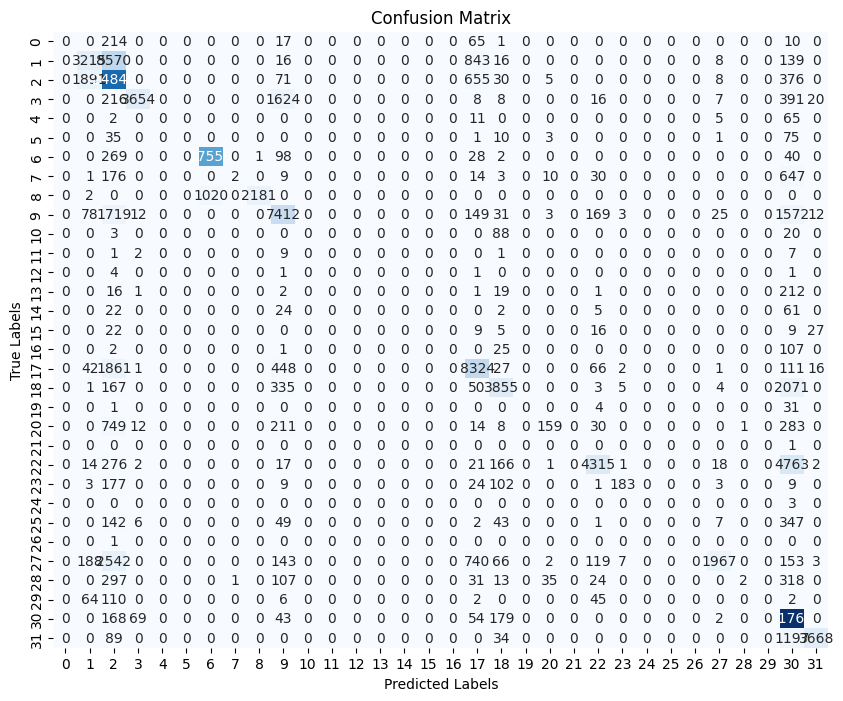

In [ ]:
#confusion matrix for validation set
y_pred = rf_model.predict(X_val)

# Computing confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred)

# Displaying confusion matrix with heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


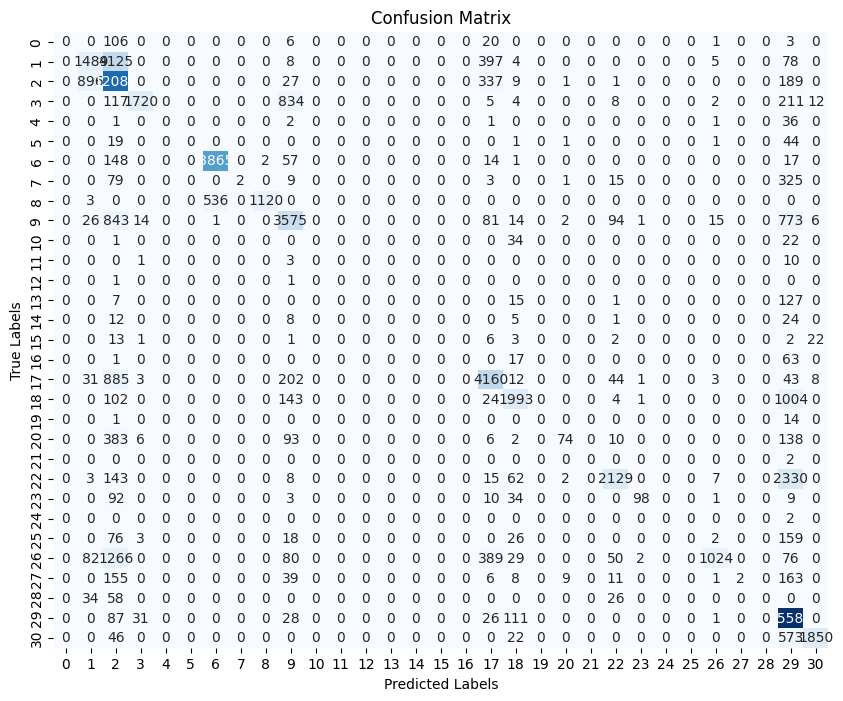

In [ ]:
#confusion matrix for test set
y_pred = rf_model.predict(X_test)

# Computing confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Displaying confusion matrix with heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

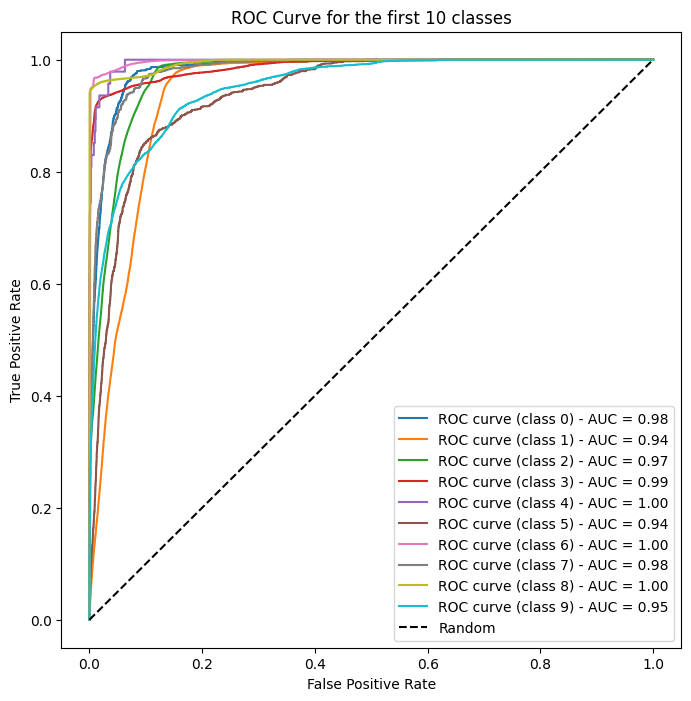

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_prob = rf_model.predict_proba(X_test)

# Choose the number of classes to display ROC curves for
n_classes = 10

plt.figure(figsize=(8, 8))

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test == i, y_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'ROC curve (class {i}) - AUC = {roc_auc:.2f}')

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve for the first {n_classes} classes before tuning')
plt.legend(loc='best')
plt.show()


In [ ]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold

param_dist = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist,
    n_iter=5,  # Adjust the number of iterations as needed
    cv=StratifiedKFold(n_splits=5),
    scoring='accuracy',
    random_state=42
)

random_search.fit(X_train, y_train)

best_params_random = random_search.best_params_
best_rf_model_random = random_search.best_estimator_

print("Best Hyperparameters (Random Search) for Random Forest:", best_params_random)


Best Hyperparameters (Random Search) for Random Forest: {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None}


In [ ]:
# Implementing Random Forest model with best parameters
rf_model_tuned = RandomForestClassifier(
    n_estimators=50,
    min_samples_split=2,
    min_samples_leaf=1,
    max_depth=None
)

# Model Fitting
rf_model_tuned.fit(X_train, y_train)


RandomForestClassifier(n_estimators=50)

In [ ]:
# Evaluate the model on the validation set
y_val_pred = rf_model_tuned.predict(X_val)

# Calculate accuracy on the validation set
accuracy = accuracy_score(y_val, y_val_pred)
print(f'Validation Accuracy: {accuracy * 100:.2f}%')

# Evaluate the model on the test set
y_test_pred = rf_model_tuned.predict(X_test)

# Calculate accuracy on the test set
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {accuracy_test * 100:.2f}%')


Validation Accuracy: 90.73%
Test Accuracy: 90.86%


In [ ]:
#validation data classification report
y_pred = rf_model_tuned.predict(X_val)

# Generate classification report
class_report = classification_report(y_val, y_pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.65      0.75       307
           1       0.60      0.61      0.60     12807
           2       0.81      0.82      0.81     27876
           3       0.98      0.97      0.98      5944
           4       0.87      0.41      0.56        83
           5       0.55      0.18      0.27       125
           6       0.98      1.00      0.99     17997
           7       0.85      0.67      0.75       892
           8       1.00      0.90      0.94      3203
           9       0.95      0.97      0.96     11185
          11       0.86      0.76      0.80       111
          12       0.88      0.35      0.50        20
          13       0.00      0.00      0.00         7
          14       0.80      0.44      0.56       252
          15       0.90      0.31      0.46       114
          16       0.83      0.22      0.34        88
          17       0.90      0.61      0.73       135
    

In [ ]:
#test data classification report
y_pred = rf_model_tuned.predict(X_test)

# Generate classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.53      0.65       136
           1       0.59      0.61      0.60      6106
           2       0.81      0.82      0.81     13547
           3       0.98      0.98      0.98      2913
           4       0.88      0.68      0.77        41
           5       0.50      0.24      0.33        66
           6       0.98      1.00      0.99      9104
           7       0.85      0.70      0.77       434
           8       1.00      0.91      0.95      1659
           9       0.95      0.97      0.96      5445
          11       0.92      0.63      0.75        57
          12       1.00      0.43      0.60        14
          13       0.00      0.00      0.00         2
          14       0.89      0.34      0.49       150
          15       0.79      0.30      0.43        50
          16       0.67      0.04      0.08        50
          17       0.90      0.74      0.81        81
    

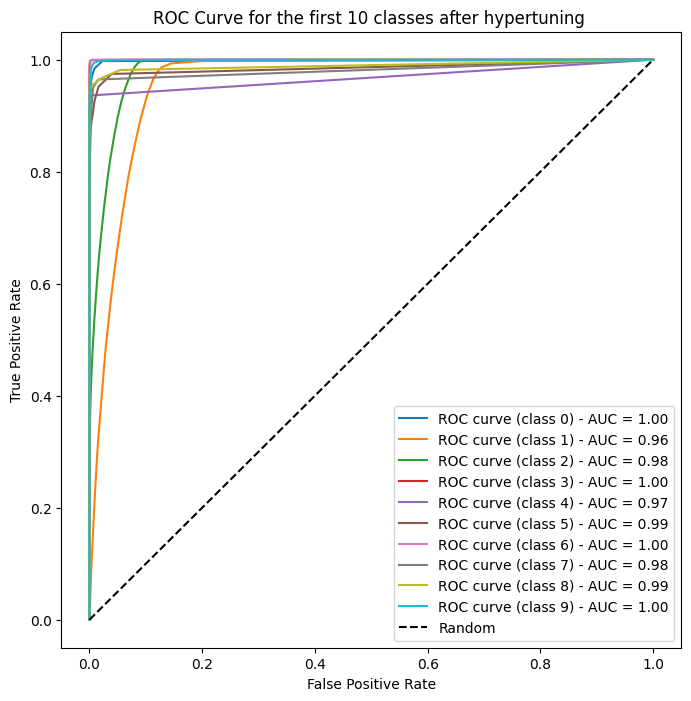

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_prob = rf_model_tuned.predict_proba(X_test)

# Choose the number of classes to display ROC curves for
n_classes = 10

plt.figure(figsize=(8, 8))

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test == i, y_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'ROC curve (class {i}) - AUC = {roc_auc:.2f}')

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve for the first {n_classes} classes after hypertuning ')
plt.legend(loc='best')
plt.show()